In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#10.1 생물학적 뉴런에서 인공 뉴런까지

##10.1.1 생물학적 뉴런

##10.1.2 뉴런을 사용한 논리 연산

##10.1.3 퍼셉트론

##10.1.4 다층 퍼셉트론과 역전파

##10.1.5 회귀를 위한 다층 퍼셉트론

##10.1.6 분류를 위한 다층 퍼셉트론

#10.2 케라스로 다층 퍼셉트론 구현하기

##10.2.1 텐서플로 2 설치

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.6.0'

In [2]:
keras.__version__

'2.6.0'

##10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

###케라스를 사용하여 데이터셋 적재하기

In [3]:
#데이터 불러오기//

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train_full.shape)

#데이터 타입이 0~255의 정수형..
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [8]:
#검증세트 분리하고 스케일링까지..

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
#클래스 이름 준비..

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

###시퀀셜 API를 사용하여 모델 만들기

층을 하나씩 추가하는 방법

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))        #입력모양 명시..
model.add(keras.layers.Dense(300, activation="relu"))       #1번째 은닉층
model.add(keras.layers.Dense(100, activation="relu"))       #2번째 은닉층
model.add(keras.layers.Dense(10, activation="softmax"))     #다중분류(10개의 클래스)

Sequential 모델을 만들때 층의 리스트를 전달하는 방법

In [15]:
#위의 층과 순서 같음..

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

모델의 요약본을 보여주는 summary()메서드

- Dense층은 파라미터가 많다.. -> **유연성**을 가지지만 **과대적합 위험**도 있다..

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
#모든 층 확인..
model.layers

In [19]:
#층을 인덱싱으로 가져올 수도 있다..
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [21]:
#층을 이름으로 가져오기..
model.get_layer('dense_6') is hidden1

True

In [22]:
#파라미터는 get_weights()와 set_weights()를 사용해서 접근 가능

weights, biases = hidden1.get_weights()

print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.05272421  0.0574936   0.02540258 ... -0.06202113 -0.07272809
  -0.0493255 ]
 [-0.00996617  0.05068396  0.0721685  ...  0.06006375 -0.01628917
   0.04173683]
 [ 0.00056997 -0.05855423  0.01945436 ... -0.01503947 -0.06014021
  -0.06122059]
 ...
 [ 0.07245281  0.06857903 -0.04508004 ... -0.02142529 -0.00622921
  -0.04571254]
 [ 0.01967357 -0.05130974  0.0628401  ... -0.03714635  0.07161632
   0.0370641 ]
 [ 0.05512607 -0.02233167  0.04043058 ...  0.02383304  0.03273168
  -0.02281661]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

###모델 컴파일

손실함수, 옵티마이저, 평가지표를 지정하는 단계..

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

###모델 훈련과 평가

In [26]:
#3분 소요
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid), n_jobs=-1)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7304 - accuracy: 0.7571 - val_loss: 0.5133 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4895 - accuracy: 0.8308 - val_loss: 0.4594 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8449 - val_loss: 0.4255 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4137 - accuracy: 0.8554 - val_loss: 0.4297 - val_accuracy: 0.8510
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3914 - accuracy: 0.8614 - val_loss: 0.3983 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8669 - val_loss: 0.3746 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3627 - accuracy: 0.8718 - val_loss: 0.3565 - val_accuracy:

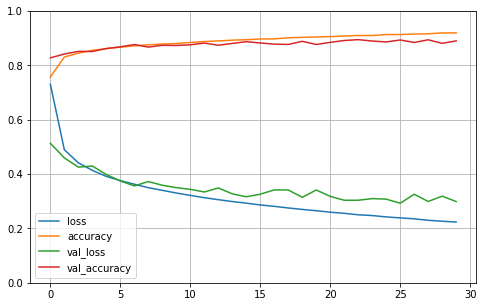

In [28]:
#History 객체에 훈련파라미터와 에포크 정보가 들어있다..
#그걸 그래프로 그림..

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)     #수직축의 범위를 0~1로 지정
plt.show()

In [29]:
#검증세트보다 조금 낮은 성능이 나오는게 일반적..

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 58.9150 - accuracy: 0.8585


[58.91498565673828, 0.8585000038146973]

###모델을 사용해 예측을 만들기

In [32]:
#새로운 데이터에 대해서 예측을 한다..
#각 클래스일 확률을 반환..

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

AttributeError: ignored

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

##10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

화귀에서 달라진 점

- 출력층이 활성화 함수가 없는 하나의 뉴런이다
- 손실함수로 RMSE를 사용한다..

캘리포니아 주택 가격 데이터셋으로 시도하겠다 :

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

#훈련, 검증, 테스트세트 분리..
X_train_full , X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

#스케일링까지..
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
#11610개의 샘플, 8개의 특성

X_train.shape

(11610, 8)

In [39]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),        #8개의 특성이 입력된다..
        keras.layers.Dense(1)       #출력층, 원하는 값의 수만큼 뉴런 생성
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]      #새로운 샘플이라고 생각..
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9391 - val_loss: 0.5433
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5178 - val_loss: 0.4500
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4638 - val_loss: 0.4175
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4303 - val_loss: 0.3935
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4111 - val_loss: 0.3961
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4010 - val_loss: 0.3788
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3936 - val_loss: 0.3687
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3872 - val_loss: 0.3672
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3892 - val_loss: 0.3692
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3885 - val_loss: 0.3639

In [41]:
#손실함수 값..

mse_test

0.3704068064689636

In [42]:
#예측 값..

y_pred

array([[1.336951 ],
       [1.2654414],
       [2.6421933]], dtype=float32)

##10.2.4 함수형 API를 사용해 복잡한 모델 만들기

입력의 일부 또는 전체가 출력층에 바로 연결됨..

- 은닉층을 모두 통과하는 입력은 **복잡한 패턴**을 학습한다
- 바로 출력층에 연결되는 입력은 **간단한 규칙**을 학습한다..

In [43]:
#입력 지정..
input_ = keras.layers.Input(shape=X_train.shape[1:])

#층을 함수라고 생각했을때 input_이 입력이 된다..
hidden1 = keras.layers.Dense(30, activation="relu")(input_)     
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#입력과 은닉층의 결과를 연결하는 연결층..
concat = keras.layers.Concatenate()([input_, hidden2])

#출력층에 전달..
output = keras.layers.Dense(1)(concat)

#초기 입력과 최종 출력을 연결해서 모델 생성..
model = keras.Model(inputs=[input_], outputs=[output])

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_12[0][0]               

컴파일하고 훈련해서 예측하기..

In [45]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1612 - val_loss: 0.7674
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7281 - val_loss: 0.6537
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6550 - val_loss: 0.6138
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6081 - val_loss: 0.5761
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5753 - val_loss: 0.5449
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5503 - val_loss: 0.5219
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5301 - val_loss: 0.5064
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5139 - val_loss: 0.4917
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4975 - val_loss: 0.4733
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4893 - val_loss: 0.4635

두 경로에 다른 입력 특성을 전달하기

In [46]:
#입력을 따로 지정..
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

#은닉층에는 input_B만 전달
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#input_A와 은닉층의 결과 합침..
concat = keras.layers.concatenate([input_A, hidden2])
#출력층에 전달..
output = keras.layers.Dense(1, name="output")(concat)

#두개의 입력을 구분해서 리스트로 전달..
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [47]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           930         dense_14[0][0]                   
____________________________________________________________________________________________

컴파일, 훈련, 예측 할때도 모두 입력을 다르게 해줘야함..

- 모델의 입력에 맞도록!!

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#전체 특성이 8개였음..
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

#새로운 데이터 지정..
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

#훈련(입력을 다르게 넣어줌..)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

#예측할 때도..
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5693 - val_loss: 1.1597
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8942 - val_loss: 0.7757
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7177 - val_loss: 0.6729
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6500 - val_loss: 0.6197
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6092 - val_loss: 0.5827
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5805 - val_loss: 0.5559
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5579 - val_loss: 0.5343
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5395 - val_loss: 0.5160
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5252 - val_loss: 0.5023
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5127 - val_loss: 0.4899

In [49]:
mse_test

0.45145151019096375

In [50]:
y_pred

array([[1.4676446],
       [1.644115 ],
       [2.6696086]], dtype=float32)

보조출력을 추가하기!!

- 은닉층의 결과만 따로 출력하고 싶다..
- 각 출력은 자신만의 손실 함수가 필요하다..
    - 따로 컴파일단계에서 지정해 줘야한다!

In [51]:
#위와 동일..
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

#보조 출력 추가.. 두번째 은닉층의 결과를 받아옴..
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

#모델 생성 시 출력에도 추가..
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [53]:
#각 출력을 위한 손실함수를 리스트로 전달..
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [54]:
#훈련..
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7520 - main_output_loss: 2.6143 - aux_output_loss: 3.9911 - val_loss: 1.1841 - val_main_output_loss: 1.0027 - val_aux_output_loss: 2.8165
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9524 - main_output_loss: 0.7945 - aux_output_loss: 2.3736 - val_loss: 0.7960 - val_main_output_loss: 0.6668 - val_aux_output_loss: 1.9588
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7380 - main_output_loss: 0.6252 - aux_output_loss: 1.7530 - val_loss: 0.6771 - val_main_output_loss: 0.5829 - val_aux_output_loss: 1.5243
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6549 - main_output_loss: 0.5710 - aux_output_loss: 1.4098 - val_loss: 0.6157 - val_main_output_loss: 0.5417 - val_aux_output_loss: 1.2822
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6068 - main_output_loss: 0.5395 - aux_output_loss: 1.2129 - val_loss

In [55]:
#evaluate()메서드 수행 시 개별 손실과 함께 총 손실도 반홛..
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

#예측도 각 출력에 대한 예측을 반환..
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4836 - main_output_loss: 0.4498 - aux_output_loss: 0.7876


In [57]:
print(total_loss, main_loss, aux_loss)
print(y_pred_main)
print(y_pred_aux)

0.48357605934143066 0.44979196786880493 0.7876317501068115
[[1.483877 ]
 [1.6635251]
 [2.5343146]]
[[2.0272222]
 [2.1890395]
 [2.1293535]]


##10.2.5 서브클래싱 API로 동적 모델 만들기

- 위의 시퀀셜 API, 함수형 API는 모두 선언적이다..
- 정적인 그래프이다..
- 장점이 많다..
    - 저장, 복사, 공유가 쉽다..
    - 모델의 구조를 분석하기 쉽다..
- 단점이 될 수도 있는데, 좀 딱딱한 느김이다..
- 서브클래싱 API를 사용하면 더 자유로워진다

**서브클래싱 API 분석**

- 장점
    - call()메서드 안에서 어떠한 계산도 사용할 수 있다..
- 단점
    - 분석이 어렵다..
    - 층 간의 연결 정보를 얻기 어렵다..

In [59]:
class WideAndDeepModel(keras.Model):
    #생성자에서 층 구성..
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  #표준 매개변수를 처리합니다
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    #call메서드에서 수행하려는 연산을 기술..
    def call(self, inputs):
        input_A, input_B = inputs   #인자로 받은 입력..

        #은닉층 구성하고 input_B 특성만 전달..
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden_1)

        #연결층에서 연결..
        concat = keras.layers.concatenate([input_A, hidden2])

        #메인과 보조출력 추가..
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

##10.2.6 모델 저장과 복원

In [60]:
#모델 생성..
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

#모델 컴파일..
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#훈련 및 예측..
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.5656 - val_loss: 1.0722
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9043 - val_loss: 0.7302
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6868 - val_loss: 0.6435
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6266 - val_loss: 0.5967
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5897 - val_loss: 0.5626
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5608 - val_loss: 0.5360
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5391 - val_loss: 0.5156
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5204 - val_loss: 0.4982
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5041 - val_loss: 0.4820
Epoch 10/10
162/162 [==============================] - 0s 976us/step - loss: 0.4894


In [61]:
#모델 저장

model.save("my_keras_model.h5")

In [62]:
#불러오기

model = keras.models.load_model("my_keras_model.h5")

In [63]:
#가중치 저장 및 불러오기도 가능

model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

##10.2.7 콜백 사용하기

훈련과정에서 일정한 간격으로 체크포인트를 지정

In [65]:
#모델 생성..
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

#모델 컴파일..
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

체크포인트 생성

In [66]:
#최상의 검증 세트 점수에서만 모델 저장..
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

#최상의 모델로 롤백
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0136 - val_loss: 0.8766
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7829 - val_loss: 0.6944
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6754 - val_loss: 0.6333
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6314 - val_loss: 0.5971
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5992 - val_loss: 0.5677
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5726 - val_loss: 0.5451
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5524 - val_loss: 0.5256
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5352 - val_loss: 0.5100
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5205 - val_loss: 0.4967
Epoch 10/10
162/162 [==============================] - 0s 904us/step - loss: 0.5268


**조기종료 콜백 사용**

- 에포크의 제한이 없어진다...

In [67]:
#조기종료 콜백 객체 생성
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

#훈련..
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4970 - val_loss: 0.4748
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.4651
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4783 - val_loss: 0.4564
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4706 - val_loss: 0.4491
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4635 - val_loss: 0.4419
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4565 - val_loss: 0.4354
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4504 - val_loss: 0.4297
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4448 - val_loss: 0.4235
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4394 - val_loss: 0.4182
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4341 - val_lo

사용자 정의 콜백도 만들 수 있다..

- 훈련하는 동안 검증손실과 훈련손실의 비율을 출력한다..
- 과대적합 방지 용도..

In [70]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [71]:
#이렇게 전달 가능..

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3323 - val_loss: 0.3197

val/train: 0.96
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3316 - val_loss: 0.3194

val/train: 0.96
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3313 - val_loss: 0.3186

val/train: 0.96
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3306 - val_loss: 0.3189

val/train: 0.96
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3304 - val_loss: 0.3175

val/train: 0.96
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3300 - val_loss: 0.3178

val/train: 0.96
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3294 - val_loss: 0.3172

val/train: 0.96
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3289 - val_loss: 0.3174

val/train: 0.97
Epoch 9/20
363/363 [==============================] - 1s 1ms/ste

##10.2.8 텐서보드를 사용해 시각화하기

#10.3 신경망 하이퍼파라미터 튜닝하기

- 신경망이 유연할수록, 트레이드오프로 조정할 하이퍼파라미터가 많다는 단점도 존재한다..

- 랜덤서치나 그리드서치를 조진다..

build_model()메서드 생성..

- 시퀀셜 모델 생성
- n_hidden만큼의 은닉층 생성..
- 은닉층의 뉴런 수는 n_neurons..

In [72]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    #시퀀셜 모델 생성..
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    #n_hidden 만큼의 은닉층 추가
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))

    #옵티마이저 지정..
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [73]:
#기본 build_model으로 모델 생성..

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [75]:
#콜백 지정해서 훈련..

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2093 - val_loss: 0.6586
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6345 - val_loss: 0.5802
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5721 - val_loss: 0.5282
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5383 - val_loss: 0.4963
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5018 - val_loss: 0.4736
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4820 - val_loss: 0.4593
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4681 - val_loss: 0.4438
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4561 - val_loss: 0.4325
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4461 - val_loss: 0.4206
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4385 - val_lo

In [76]:
#점수 확인..
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4172


In [ ]:
#예측 확인..
#보류..

y_pred = keras_reg.predict(X_new)

In [78]:
y_pred

array([1.3024249, 1.2841678, 2.4486275], dtype=float32)

**랜덤 서치**

- 오류 해결을 위한 .tolist(), .rvs(1000).tolist()

In [83]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

#탐색할 하이퍼파라미터..
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

#랜덤서치 객체.. cv가 지정되므로 X_valid와 y_valid는 조기종료에만 사용됨..
#n_jobs=-1하면 오류뜸..
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs,
                                   n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=83, n_hidden=1, learning_rate=0.0028673928684083967 ...
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 1.5072 - val_loss: 0.6960
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6569 - val_loss: 0.6253
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6040 - val_loss: 0.5810
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5823 - val_loss: 0.5456
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5374 - val_loss: 0.5237
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5364 - val_loss: 0.5191
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5313 - val_loss: 0.4645
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6258 - val_loss: 0.4916
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5617 - val_loss: 0.4438
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5089 - val_loss: 0.4705
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.4s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 1.5318 - val_loss: 0.6494
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7072 - val_loss: 0.5853
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5856 - val_loss: 0.5345
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5415 - val_loss: 0.4987
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5107 - val_loss: 0.4738
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4896 - val_loss: 0.4558
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4740 - val_loss: 0.4433
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4631 - val_loss: 0.4338
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4537 - val_loss: 0.4273
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4464 - val_loss: 0.4191
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 17.2min finished


363/363 [==============================] - 1s 2ms/step - loss: 0.6611 - val_loss: 0.4079
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4391 - val_loss: 0.3696
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3858 - val_loss: 0.3589
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3656 - val_loss: 0.3387
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3520 - val_loss: 0.3505
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3461 - val_loss: 0.3400
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3392 - val_loss: 0.3201
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3320 - val_loss: 0.3185
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3272 - val_loss: 0.3124
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3215 - val_loss: 0.3536
E

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f212b0d8a10>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.002061384396882985,
                                                          0.000496919217408326,
                                                          0.00790255882354201,
                                                          0.00046588444929100903,
                                                          0.0074825709234574945,
                                                          0.00033683792825179107,
                                                          0.00031907107302413354,
                                                          0.0...
                                                          0.019450550864431003,
                                                          0.0040700046477898585,
     

In [84]:
rnd_search_cv.best_params_

{'learning_rate': 0.012281399782266571, 'n_hidden': 3, 'n_neurons': 91}

In [85]:
rnd_search_cv.best_score_

-0.29035115242004395

In [86]:
model = rnd_search_cv.best_estimator_.model

**랜덤서치의 단점**

- 하이퍼파라미터 공간이 크면 시간이 오래 걸린다..
- 하이퍼파라미터의 값의 범위를 크게해서 일단 첫 범위를 찾고, 그 중에 좋은 곳에서 또 다시 랜덤서치함..

**더 효율적인 탐색 기법**

- 탐색지역이 좋다고 판명될 때 더 탐색을 수행한다!!
- 이용할 수 있는 라이브러리들..
    - Hyperpot
    - Hyperas, kopt, Talos
    - 케라스 튜너
    - Scikit-Optimize(skopt)
    - Spearmint
    - Hyperband
    - Sklearn-Deap

##10.3.1 은닉층 개수

**입력층, 출력층의 갯수**

- 해당 작업에 필요한 입력과 출력의 형태에 따라 결정됨..
- ex) 숫자 mnist : 28*28개의 입력뉴런, 10개의 출력뉴런

**은닉층의 구성**

- 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성
- 첫번째 은닉층을 크게 하는 것이 도움이 됨..
- 실전에서는 **필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 조기종료나 규제기법을 사용하는 것**이 효과적임..
- 한 층의 뉴런 수가 너무 적으면 입력의 유용한 특성을 충분히 표현하지 못한다..
    - ex) 3D데이터인데 뉴런이 2개라면 다 표현을 못한다..

##10.3.2 은닉층의 뉴런 개수

##10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

###학습률

- 매우 낮은 학습률에서 점점 키워가면서 조정..
- 다른 하이퍼파라미터 조정 후 다시 탐색해야함..

###옵티마이저

- 좋은 옵티마이저를 선택해라..

###배치 크기

- 크게 좋다는 쪽도 있고
- 32개의 배치 사이즈로 하는게 국룰이라는 쪽도 있다..

###활성화 함수

- 기본값 : Relu

###반복 획수

- 이건 조정하기 보다는 엄청 크게 한 다음 조기종료하는게 더 이득..

#10.4 연습문제